<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/df1_outliers_removed_Android_SIA_app_vs_SIA_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel("/content/drive/MyDrive/corrected SIA app and SIA calculator magnitude axis.xlsx")


In [11]:
df.shape

(107, 4)

In [12]:
df.head()

,appmagnitude,calculatormagnitude,appaxis,calculatoraxis
0,0.36,1.04,1.290,105
1,2.07,3.42,4.010,68
2,2.47,1.75,0.076,155
3,0.51,1.47,1.640,50
4,0.71,1.26,0.629,141


In [13]:
df.tail()

,appmagnitude,calculatormagnitude,appaxis,calculatoraxis
102,0.170,0.49,0.328,59
103,0.530,1.00,0.921,84
104,1.056,0.83,0.654,83
105,1.247,1.65,1.508,87
106,0.530,0.56,0.330,33


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   appmagnitude         107 non-null    float64
 1   calculatormagnitude  107 non-null    float64
 2   appaxis              107 non-null    float64
 3   calculatoraxis       107 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 3.5 KB


In [15]:
df.describe()

,appmagnitude,calculatormagnitude,appaxis,calculatoraxis
count,107.000000,107.000000,107.000000,107.000000
mean,1.314382,1.490467,1.515748,91.728972
std,1.638689,1.096741,1.854832,37.272725
min,0.000000,0.170000,0.000000,1.000000
25%,0.353500,0.785000,0.497000,64.000000
50%,0.870000,1.260000,1.060000,88.000000
75%,1.580000,1.865000,1.889500,119.500000
max,9.000000,6.530000,15.710000,179.000000


<Axes: >

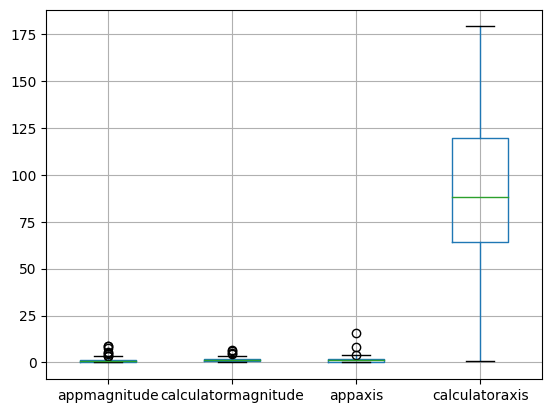

In [16]:
df.boxplot()

<Axes: >

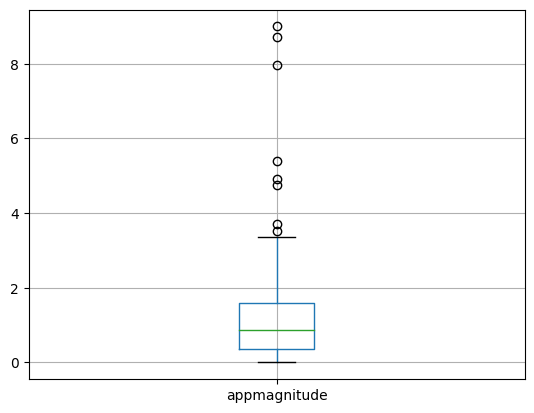

In [17]:
df.boxplot("appmagnitude")

<Axes: >

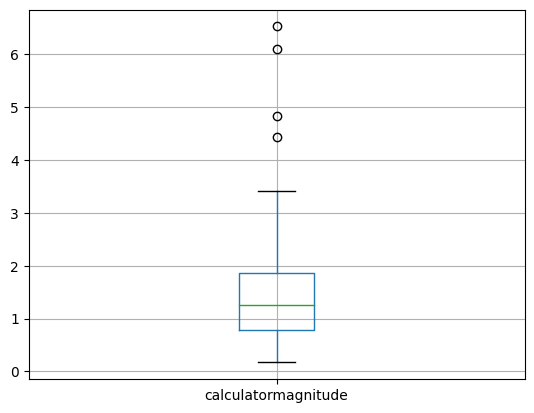

In [18]:
df.boxplot("calculatormagnitude")

In [36]:
q1 = df.appmagnitude.quantile(0.25)
q3 = df.appmagnitude.quantile(0.75)

In [37]:
iqr = q3-q1

In [38]:
lowerlimit = q1-1.5*iqr
upperlimit = q3+1.5*iqr

<Axes: >

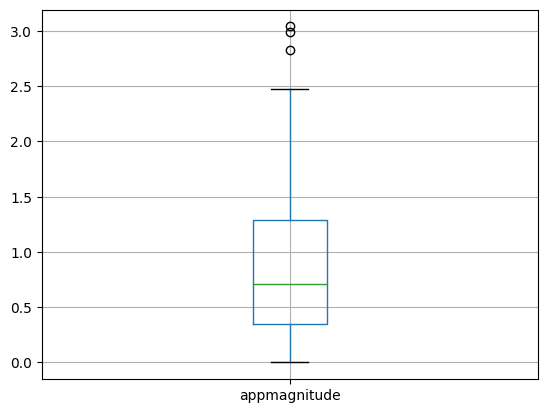

In [40]:
df1 = df[(df.appmagnitude>lowerlimit) & (df.appmagnitude<upperlimit)]
df1.boxplot('appmagnitude')


<Axes: >

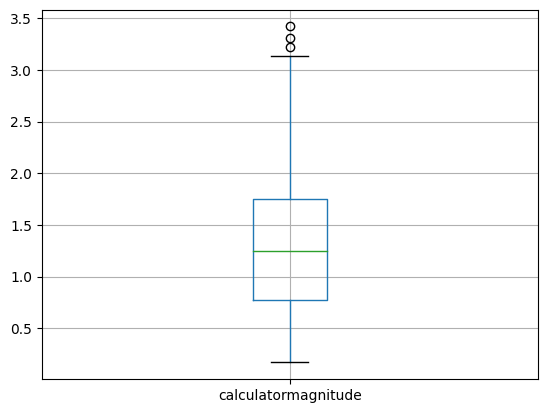

In [41]:
df1.boxplot('calculatormagnitude')

In [42]:
df1.shape

(96, 4)

<Axes: >

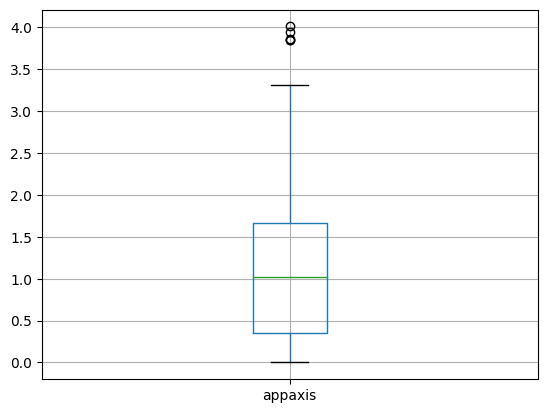

In [43]:
df1.boxplot("appaxis")

<Axes: >

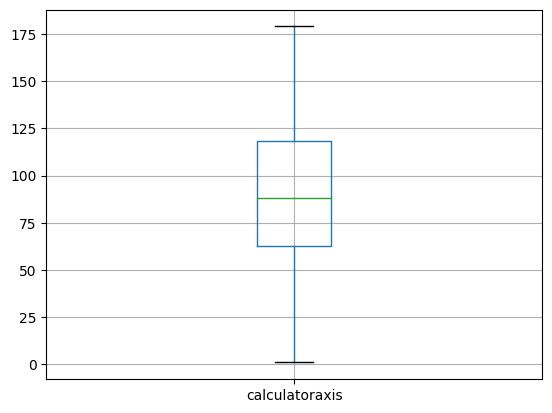

In [44]:
df1.boxplot('calculatoraxis')

array([[<Axes: title={'center': 'appmagnitude'}>,
        <Axes: title={'center': 'calculatormagnitude'}>],
       [<Axes: title={'center': 'appaxis'}>,
        <Axes: title={'center': 'calculatoraxis'}>]], dtype=object)

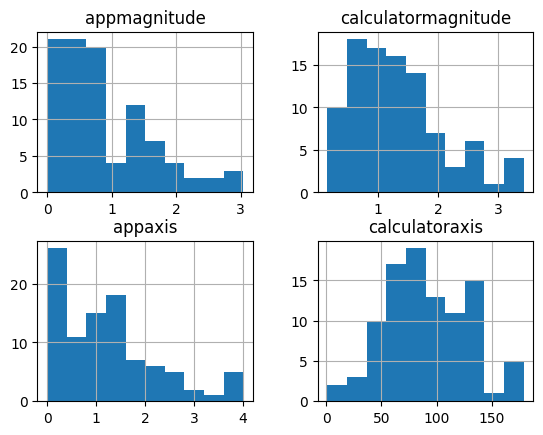

In [45]:
df1.hist()

In [46]:
df1.corr()

,appmagnitude,calculatormagnitude,appaxis,calculatoraxis
appmagnitude,1.000000,0.311754,0.238335,-0.099704
calculatormagnitude,0.311754,1.000000,0.826748,-0.095820
appaxis,0.238335,0.826748,1.000000,-0.130706
calculatoraxis,-0.099704,-0.095820,-0.130706,1.000000


<Axes: >

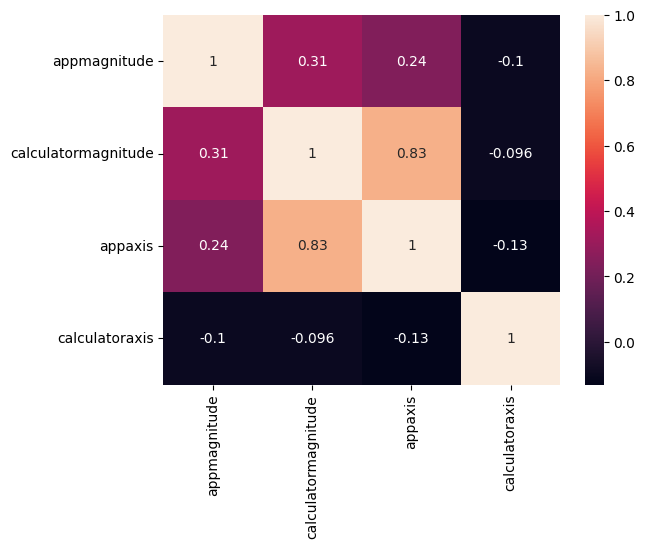

In [47]:
import seaborn as sns
corr = df1.corr()
sns.heatmap(corr, annot=True)

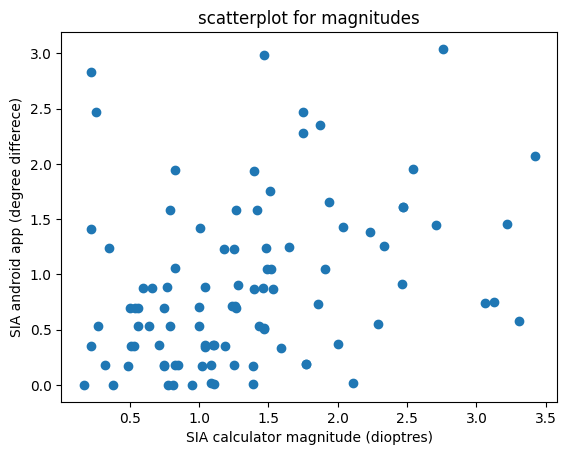

In [48]:
import matplotlib.pyplot as plt
x = df1['calculatormagnitude']
y = df1['appmagnitude']
plt.title('scatterplot for magnitudes')
plt.xlabel('SIA calculator magnitude (dioptres)')
plt.ylabel('SIA android app (degree differece)')
plt.scatter(x,y)


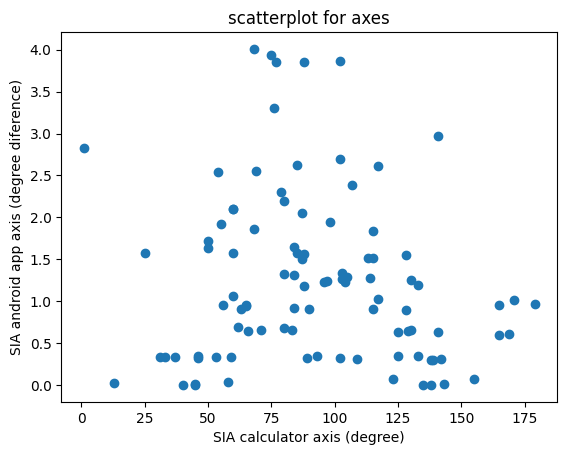

In [49]:
x = df1['calculatoraxis']
y = df1['appaxis']
plt.title('scatterplot for axes')
plt.xlabel('SIA calculator axis (degree)')
plt.ylabel('SIA android app axis (degree diference)')
plt.scatter(x,y)

In [50]:
df1.columns

Index(['appmagnitude', 'calculatormagnitude', 'appaxis', 'calculatoraxis'], dtype='object')

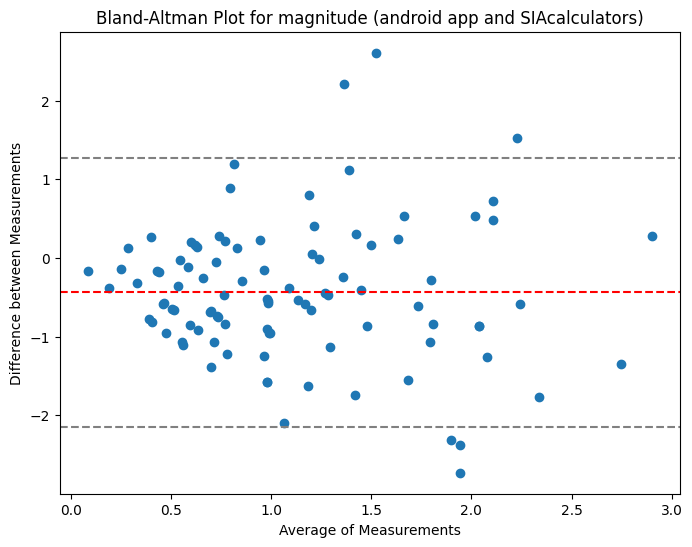

In [51]:
import numpy as np
import matplotlib.pyplot as plt

androidapp = df1['appmagnitude']
SIAcalculator = df1['calculatormagnitude']

def bland_altman_plot(androidapp, SIAcalculator, *args, **kwargs):
    """
    Bland-Altman plot function.

    androidapp : 1D array-like
        First set of measurements.
    SIAcalculator : 1D array-like
        Second set of measurements.
    """
    androidapp = np.asarray(androidapp)
    SIAcalculator = np.asarray(SIAcalculator)

    # Compute the differences between android app and SIA calculator
    differences = androidapp - SIAcalculator

    # Compute the average of the measurements
    averages = (androidapp + SIAcalculator) / 2.0

    # Create the Bland-Altman plot
    plt.figure(figsize=(8, 6))
    plt.scatter(averages, differences, *args, **kwargs)

    # Add a horizontal line at the mean of the differences
    plt.axhline(differences.mean(), color='red', linestyle='--')

    # Add limits and labels
    mean_difference = differences.mean()
    sd_difference = differences.std()
    plt.title('Bland-Altman Plot for magnitude (android app and SIAcalculators)')
    plt.xlabel('Average of Measurements')
    plt.ylabel('Difference between Measurements')
    plt.axhline(mean_difference + 1.96 * sd_difference, color='gray', linestyle='--')
    plt.axhline(mean_difference - 1.96 * sd_difference, color='gray', linestyle='--')

    # Show plot
    plt.show()

# Plot Bland-Altman plot
bland_altman_plot(androidapp, SIAcalculator)


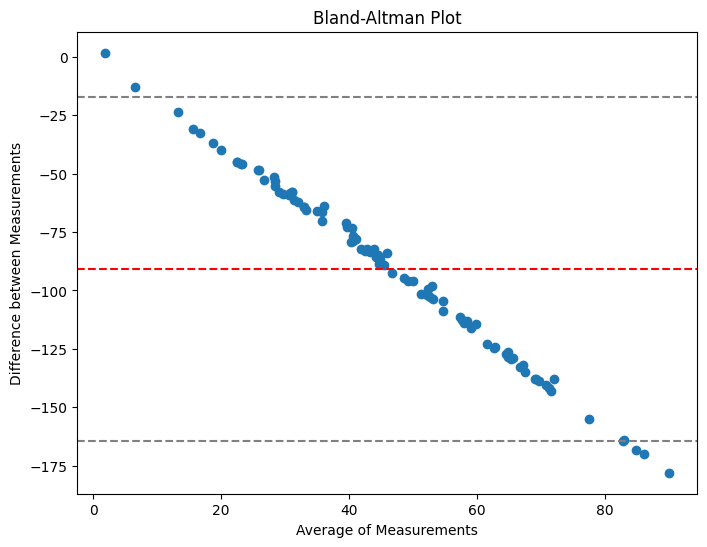

In [52]:
androidappaxis = df1['appaxis']
SIAcalculatoraxis = df1['calculatoraxis']

def bland_altman_plot(androidappaxis, SIAcalculatoraxis, *args, **kwargs):
    """
    Bland-Altman plot function.

    data1 : 1D array-like
        First set of measurements.
    data2 : 1D array-like
        Second set of measurements.
    """
    androidappaxis = np.asarray(androidappaxis)
    SIAcalculatoraxis = np.asarray(SIAcalculatoraxis)

    # Compute the differences between data1 and data2
    differences = androidappaxis - SIAcalculatoraxis

    # Compute the average of the measurements
    averages = (androidappaxis + SIAcalculatoraxis) / 2.0

    # Create the Bland-Altman plot
    plt.figure(figsize=(8, 6))
    plt.scatter(averages, differences, *args, **kwargs)

    # Add a horizontal line at the mean of the differences
    plt.axhline(differences.mean(), color='red', linestyle='--')

    # Add limits and labels
    mean_difference = differences.mean()
    sd_difference = differences.std()
    plt.title('Bland-Altman Plot')
    plt.xlabel('Average of Measurements')
    plt.ylabel('Difference between Measurements')
    plt.axhline(mean_difference + 1.96 * sd_difference, color='gray', linestyle='--')
    plt.axhline(mean_difference - 1.96 * sd_difference, color='gray', linestyle='--')

    # Show plot
    plt.show()

# Plot Bland-Altman plot
bland_altman_plot(androidappaxis, SIAcalculatoraxis)


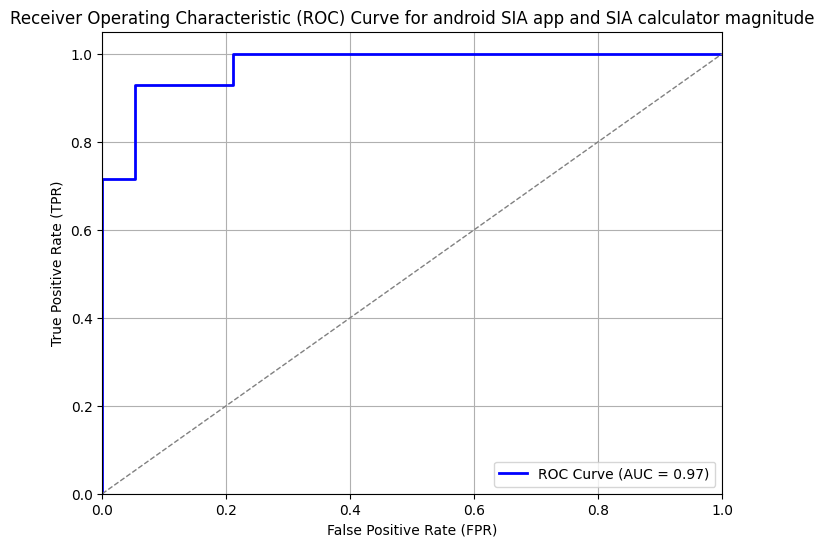

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score


X = df1['calculatormagnitude']
y = df1['appmagnitude']
X, y = make_classification(n_samples=107,random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities of the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Plot the random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for android SIA app and SIA calculator magnitude')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

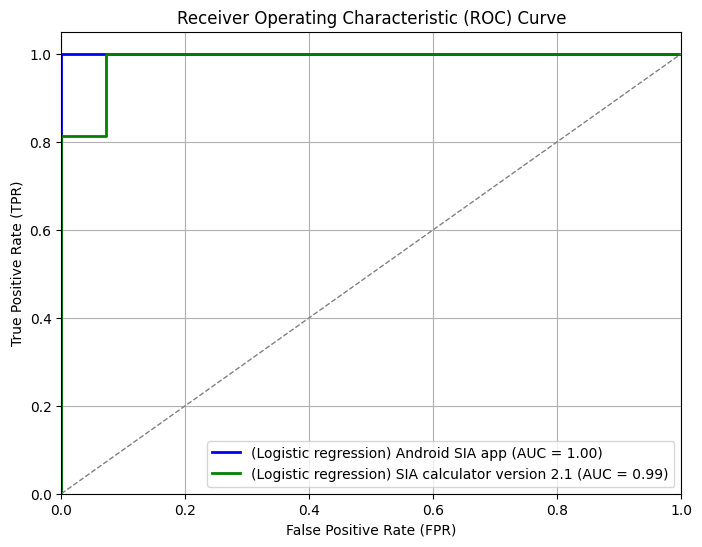

In [54]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

X1 = df1['appmagnitude']
y1 = df1['appaxis']

X2 = df1['calculatormagnitude']
y2 = df1['calculatoraxis']

X1, y1 = make_classification(random_state=42)
X2, y2 = make_classification(random_state=42)

# Split android SIA app into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Split SIA calculator version 2.1 into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=24)

# Initialize classifiers for android app and sia calculator
android_SIA_app = LogisticRegression()
SIA_calculator = LogisticRegression()

# Fit classifiers on android app and sia calculator
android_SIA_app.fit(X1_train, y1_train)
SIA_calculator.fit(X2_train, y2_train)

# Predict probabilities of the positive class (class 1) for android app and sia calculator
y1_prob = android_SIA_app.predict_proba(X1_test)[:, 1]
y2_prob = SIA_calculator.predict_proba(X2_test)[:, 1]

# Compute ROC curve and ROC area for android app and sia calculator
fpr1, tpr1, _ = roc_curve(y1_test, y1_prob)
roc_auc1 = roc_auc_score(y1_test, y1_prob)

fpr2, tpr2, _ = roc_curve(y2_test, y2_prob)
roc_auc2 = roc_auc_score(y2_test, y2_prob)

# Plot ROC curves for android app and sia calculator
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'(Logistic regression) Android SIA app (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'(Logistic regression) SIA calculator version 2.1 (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Plot the logistic classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
